In [1]:
%cd ..

/home/thmtt/AGH/6-semester/bo/pszczolki


In [2]:
import json
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from typing import Iterable, Callable, List, Tuple, Union

In [3]:
RunType = List[List[float]]
DatasetType = List[RunType]

In [4]:
def clean_json(data: dict) -> List[List[float]]:
    return [
        v
        for k, v in sorted(data.items(), key=lambda x: int(x[0]))
    ]

In [5]:
def load_series(template: str, return_names: bool = False) -> Union[DatasetType, Tuple[DatasetType, List[str]]]:
    dir = "/".join(template.split('/')[:-1])
    file_template = template.split('/')[-1]
    res = []
    names = []
    for filename in os.listdir(dir):
        if file_template in filename:
            names.append(filename)
            with open(os.path.join(dir, filename), 'r') as f:
                res.append(clean_json(json.loads(f.read())))
            print(f'loaded file: {filename}')
    if return_names:
        return res, names
    return res

In [6]:
first_model = load_series('runs/100-20-10-30-100')

loaded file: 100-20-10-30-100_2.json
loaded file: 100-20-10-30-100_9.json
loaded file: 100-20-10-30-100_6.json
loaded file: 100-20-10-30-100_1.json
loaded file: 100-20-10-30-100_0.json
loaded file: 100-20-10-30-100_5.json
loaded file: 100-20-10-30-100_4.json
loaded file: 100-20-10-30-100_8.json
loaded file: 100-20-10-30-100_7.json
loaded file: 100-20-10-30-100_3.json


In [50]:
def select_best_run(dataset: List[List[List[float]]]) -> List[List[float]]:
    return min(
        dataset,
        key=lambda x: min(x[-1]))

In [51]:
list(map(len, first_model))

[748, 719, 639, 911, 631, 695, 727, 924, 1007, 692]

In [52]:
def best_score(iter: Iterable[float]) -> float:
    return min(iter)

In [53]:
def average(iter: Iterable[float]) -> float:
    return sum(iter) / len(iter)

In [54]:
def std(iter: Iterable[float]) -> float:
    avg = average(iter)
    return sqrt(sum(
        (x - avg) ** 2
        for x in iter))

In [55]:
def apply_function(dataset: List[Iterable[float]], function: Callable[[Iterable[float]], float]) -> List[float]:
    return [
        function(x)
        for x in dataset
    ]

In [56]:
def apply_for_dataset(dataset: List[List[List[float]]], function: Callable[[Iterable[float]], float]) -> List[List[float]]:
    return [
        apply_function(data, function)
        for data in dataset
    ]

In [57]:
def get_best_plot(dataset: List[List[float]]) -> List[float]:
    current_best = 999999999999999
    ret = []
    for epoch in dataset:
        best_epoch = min(epoch)
        current_best = min(best_epoch, current_best)
        ret.append(current_best)
    return ret

In [58]:
def plot_set(dataset: List[List[float]]) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots()
    for data in dataset:
        ax.plot(data)
    return fig, ax

In [59]:
averages = apply_for_dataset(first_model, average)

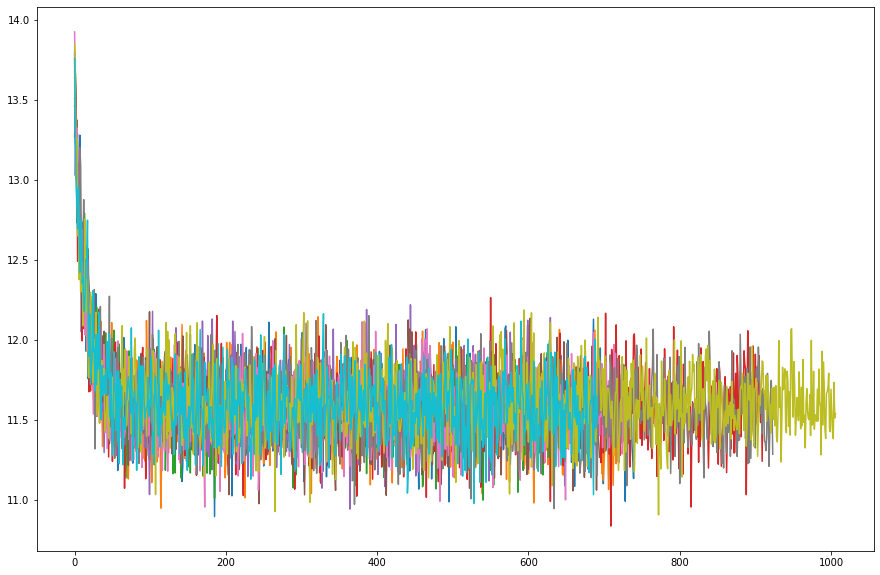

In [60]:
fig, ax = plot_set(averages)
fig.set_size_inches(15, 10)

In [61]:
best_run = select_best_run(first_model)

In [62]:
averages = apply_function(best_run, average)

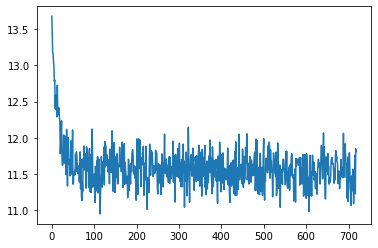

In [63]:
plt.plot(averages)

In [64]:
def plot_distribution_graph(run: List[List[float]]) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots()

    means = np.array(apply_function(run, average))
    stds = np.array(apply_function(run, std))

    x = np.linspace(0, len(run), len(run))

    plt.plot(x, means)
    plt.fill_between(x, means - stds, means + stds, color='yellow')

    plt.plot()
    return fig, ax

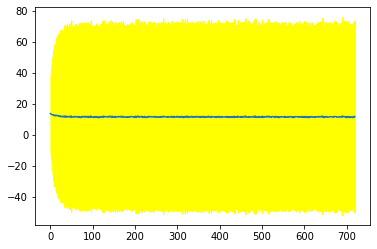

In [65]:
fig, ax = plot_distribution_graph(best_run)

In [66]:
models = [
    load_series('runs/30-20-10-30-100'),
    load_series('runs/100-20-10-30-100'),
    load_series('runs/100-30-10-50-100')]

loaded file: 30-20-10-30-100_2.json
loaded file: 30-20-10-30-100_4.json
loaded file: 30-20-10-30-100_5.json
loaded file: 30-20-10-30-100_1.json
loaded file: 30-20-10-30-100_3.json
loaded file: 30-20-10-30-100_9.json
loaded file: 30-20-10-30-100_8.json
loaded file: 30-20-10-30-100_7.json
loaded file: 30-20-10-30-100_0.json
loaded file: 30-20-10-30-100_6.json
loaded file: 100-20-10-30-100_2.json
loaded file: 100-20-10-30-100_9.json
loaded file: 100-20-10-30-100_6.json
loaded file: 100-20-10-30-100_1.json
loaded file: 100-20-10-30-100_0.json
loaded file: 100-20-10-30-100_5.json
loaded file: 100-20-10-30-100_4.json
loaded file: 100-20-10-30-100_8.json
loaded file: 100-20-10-30-100_7.json
loaded file: 100-20-10-30-100_3.json
loaded file: 100-30-10-50-100_3.json
loaded file: 100-30-10-50-100_8.json
loaded file: 100-30-10-50-100_6.json
loaded file: 100-30-10-50-100_9.json
loaded file: 100-30-10-50-100_0.json
loaded file: 100-30-10-50-100_1.json
loaded file: 100-30-10-50-100_2.json
loaded file

In [121]:
# model_desc = [
#     'n=30, m=20, e=10, nsp=30, nep=100',
#     'n=100, m=20, e=10, nsp=30, nep=100',
#     'n=100, m=30, e=10, nsp=50, nep=100'
# ]
model_desc = [
    'first model',
    'second model',
    'third model'
]

In [125]:
best_models = [
    select_best_run(dataset)
    for dataset in models]

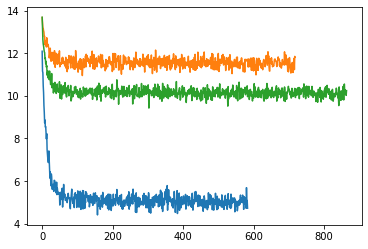

In [68]:
averages = apply_for_dataset(best_models, average)
fig, ax = plot_set(averages)

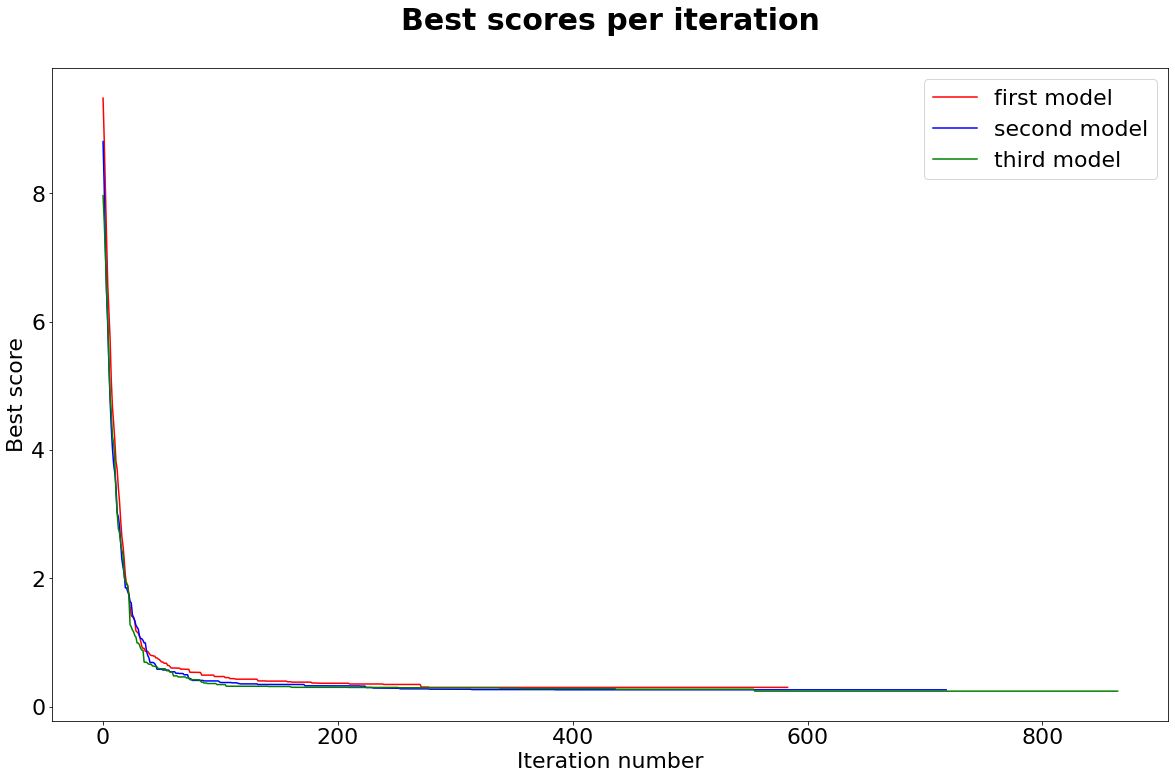

In [127]:
best = [
    get_best_plot(model)
    for model in best_models
]

colors = ['red', 'blue', 'green']

fig, ax = plt.subplots()
fig.set_size_inches(20, 12)

for color, runs, desc in zip(colors, best, model_desc):
    ax.plot(runs, color=color, label=desc)

ax.legend(loc='upper right')
ax.set_title('Best scores per iteration', fontsize=30, fontweight='bold', y=1.05)
ax.set_ylabel('Best score')
ax.set_xlabel('Iteration number')

fig.savefig('plots/best-best-runs-params.png', facecolor='white')

In [45]:
len(best_models[0])

635

In [70]:
averaged_models = [
    apply_for_dataset(dataset, average)
    for dataset in models
]

In [71]:
best_models = [
    apply_for_dataset(dataset, best_score)
    for dataset in models
]

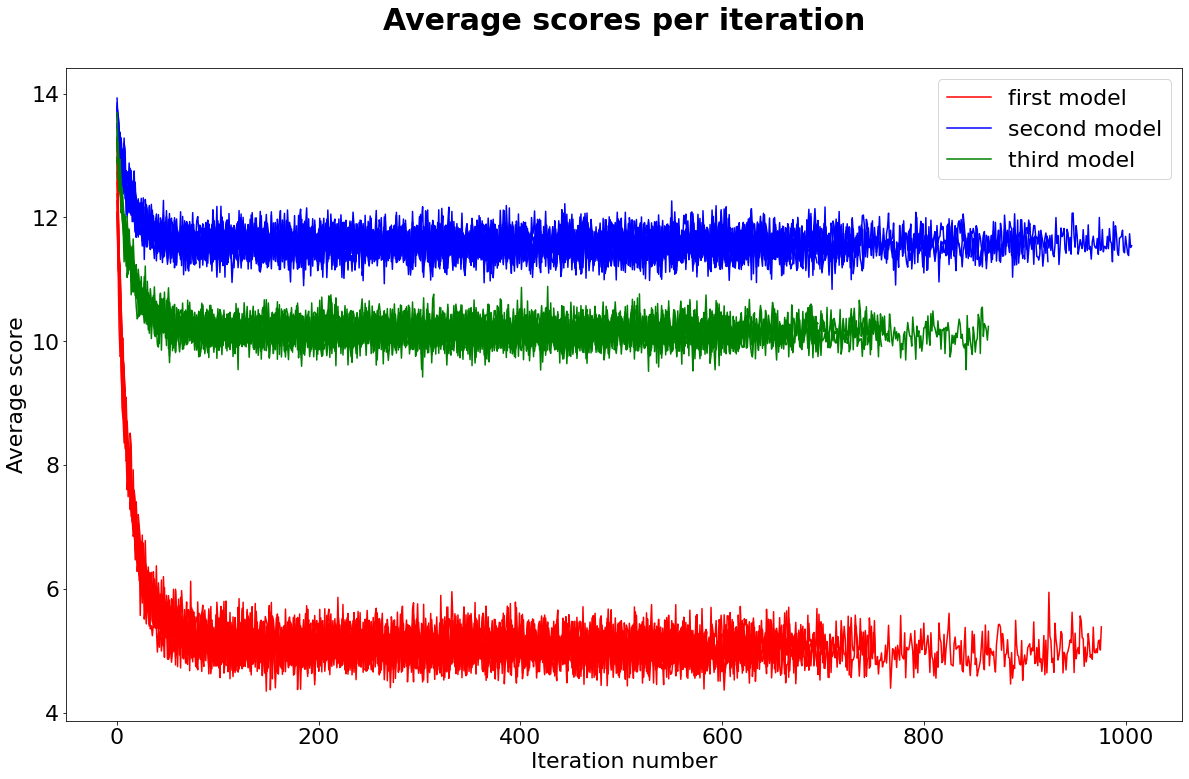

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)

colors = ['red', 'blue', 'green']

for color, runs, desc in zip(colors, averaged_models, model_desc):
    plot_label = True
    for run in runs:
        if not plot_label:
            desc = None
        plot_label = False
        ax.plot(run, color=color, label=desc)

ax.legend(loc='upper right')
ax.set_title('Average scores per iteration', fontsize=30, fontweight='bold', y=1.05)
ax.set_ylabel('Average score')
ax.set_xlabel('Iteration number')

fig.savefig('plots/average-all-runs-params.png', facecolor='white')

plt.show()

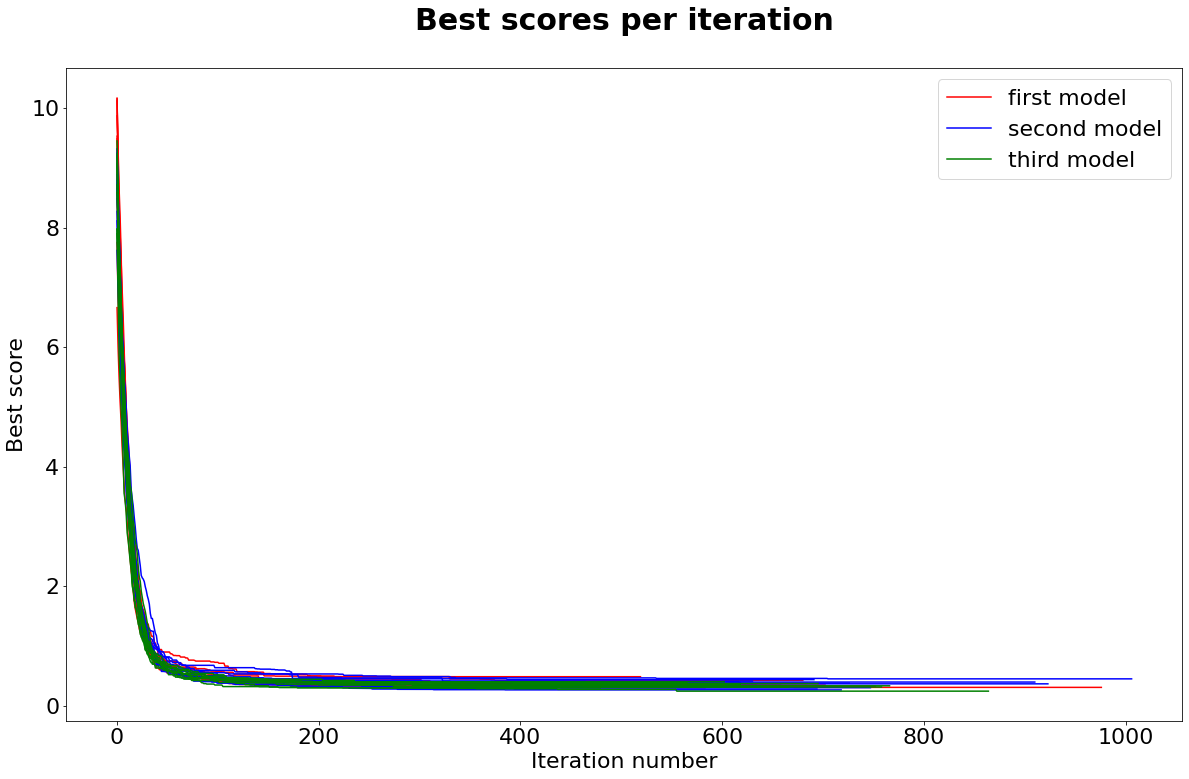

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)

colors = ['red', 'blue', 'green']

for color, runs, desc in zip(colors, best_models, model_desc):
    plot_label = True
    for run in runs:
        if not plot_label:
            desc = None
        plot_label = False
        ax.plot(run, color=color, label=desc)

ax.legend(loc='upper right')
ax.set_title('Best scores per iteration', fontsize=30, fontweight='bold', y=1.05)
ax.set_ylabel('Best score')
ax.set_xlabel('Iteration number')

fig.savefig('plots/best-all-runs-params.png', facecolor='white')

plt.show()

In [36]:
best_of_all = [
    [get_best_plot(dataset)
     for dataset in model]
    for model in models
]

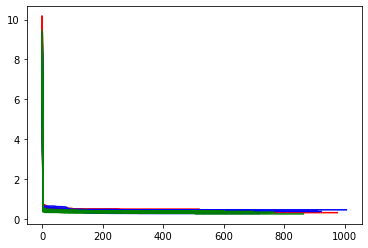

In [73]:
colors = ['red', 'blue', 'green']

for color, runs in zip(colors, best_of_all):
    for run in runs:
        plt.plot(run, color=color)

In [92]:
def plot_nme(dataset: List[List[float]], nme: Tuple[int, int, int], function: Callable[[Iterable[float]], float], colors: Tuple[str, str, str] = ('red', 'green', 'blue')) -> Tuple[plt.Figure, plt.Axes]:
    n, m, e = nme
    e_bees = [data[:e] for data in dataset]
    m_bees = [data[e:m] for data in dataset]
    n_bees = [data[m:] for data in dataset]

    bees = e_bees, m_bees, n_bees
    labels = 'elite bees', 'selected bees', 'random bees'

    fig, ax = plt.subplots()

    for bee, color, label in zip(bees, colors, labels):
        plot_data = apply_function(bee, function)

        plt.plot(plot_data, color=color, label=label)

    return fig, ax

In [87]:
all_runs, names = load_series('runs/', return_names=True)
best_run_of_all = select_best_run(all_runs)

index = all_runs.index(best_run_of_all)
names[index]

loaded file: 100-20-10-30-100_2.json
loaded file: 100-20-10-30-100_9.json
loaded file: 100-30-10-50-100_3.json
loaded file: 30-20-10-30-100_2.json
loaded file: 30-20-10-30-100_4.json
loaded file: 100-30-10-50-100_8.json
loaded file: 100-20-10-30-100_6.json
loaded file: 30-20-10-30-100_5.json
loaded file: 100-20-10-30-100_1.json
loaded file: 100-30-10-50-100_6.json
loaded file: 100-30-10-50-100_9.json
loaded file: 30-20-10-30-100_1.json
loaded file: 30-20-10-30-100_3.json
loaded file: 30-20-10-30-100_9.json
loaded file: 100-30-10-50-100_0.json
loaded file: 100-30-10-50-100_1.json
loaded file: 30-20-10-30-100_8.json
loaded file: 100-20-10-30-100_0.json
loaded file: 100-30-10-50-100_2.json
loaded file: 100-30-10-50-100_7.json
loaded file: 100-20-10-30-100_5.json
loaded file: 100-20-10-30-100_4.json
loaded file: 100-20-10-30-100_8.json
loaded file: 30-20-10-30-100_7.json
loaded file: 100-30-10-50-100_4.json
loaded file: 100-20-10-30-100_7.json
loaded file: 100-20-10-30-100_3.json
loaded fi

'100-30-10-50-100_4.json'

In [106]:
matplotlib.rcParams.update({'font.size': 22})

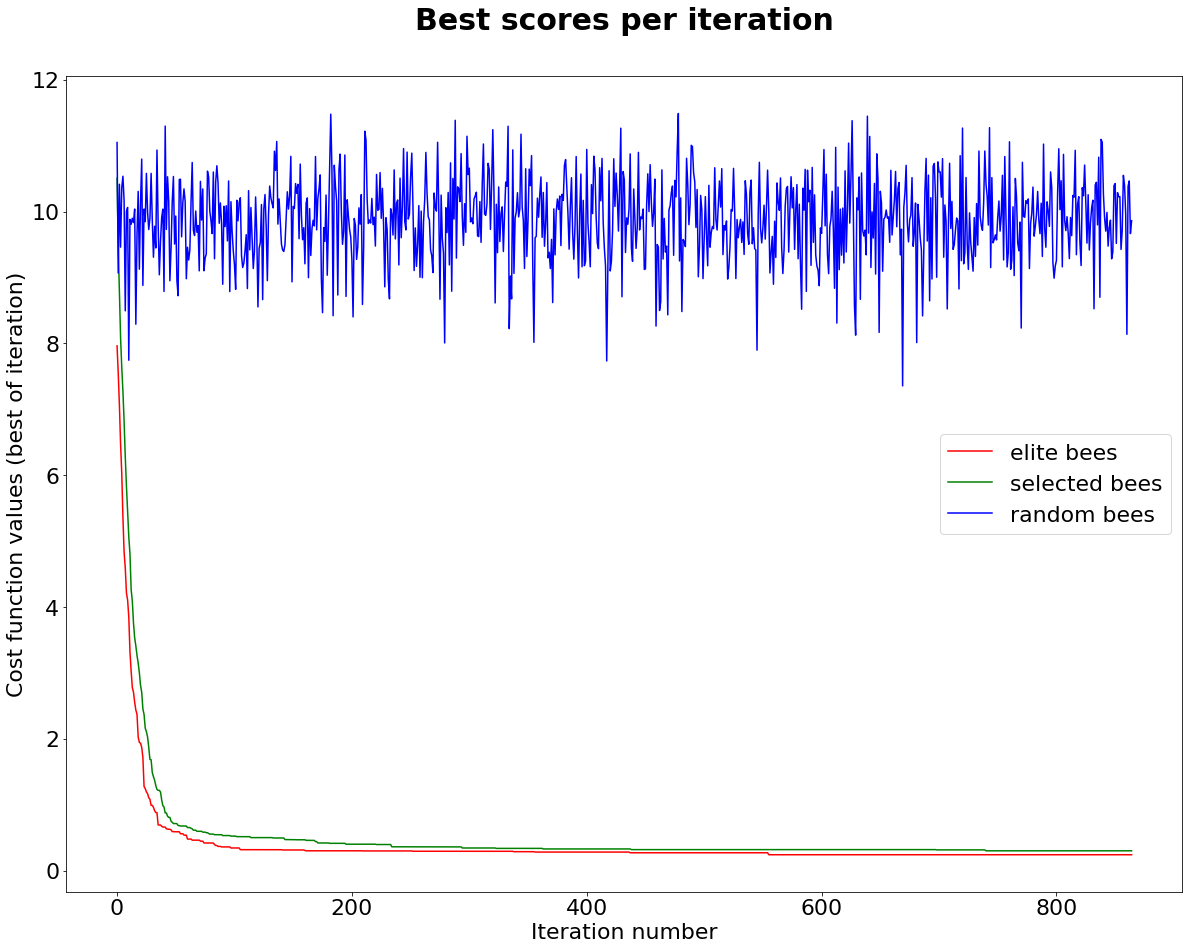

In [110]:
fig, ax = plot_nme(best_run_of_all, (100, 30, 10), best_score)
ax.legend(loc='center right')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Cost function values (best of iteration)')
ax.set_title('Best scores per iteration', y=1.05, fontsize=30, fontweight='bold')
fig.set_size_inches(20, 15)

fig.savefig('plots/best-run-bees-category.png', facecolor='white')

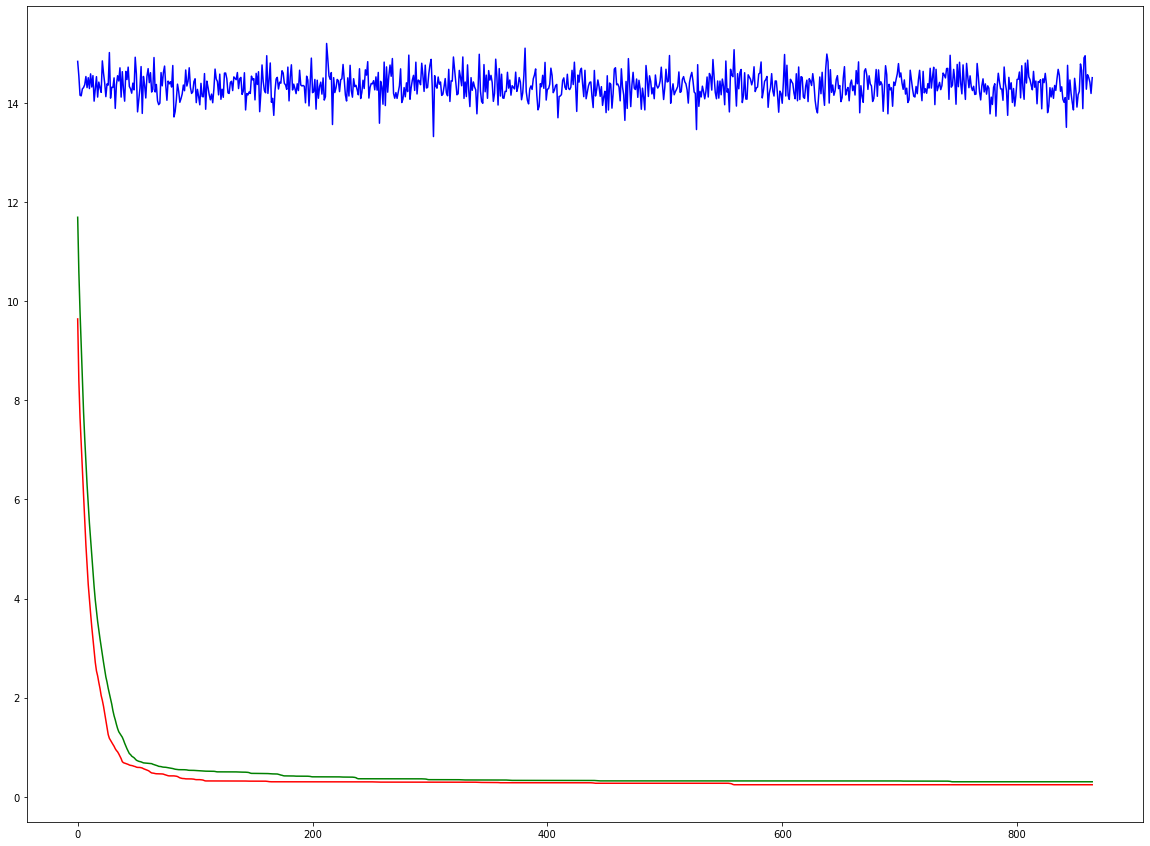

In [91]:
fig, ax = plot_nme(best_run_of_all, (100, 30, 10), average)
fig.set_size_inches(20, 15)